<a href="https://colab.research.google.com/github/pratikbanik/ML-Heart-Disease-House-Price-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have to predict if a person has a heart-disease or not.

Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Import dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [ ]:
# loading the heart disease dataset to a pandas DataFrame
heart_disease_dataset = pd.read_csv('/content/heart_disease_data.csv')
print("Dataset loaded successfully !")

Dataset loaded successfully !


In [ ]:
# printing the first 5 rows of the dataset
heart_disease_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# number of rows and Columns in this dataset
heart_disease_dataset.shape

(303, 14)

In [ ]:
# getting some information about the dataset
heart_disease_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking the number of missing values
heart_disease_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# getting the statistical measures of the data
heart_disease_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Display the classes with number data points in each class
heart_disease_dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

0 -> Having a Heart-Disease

1-> Not having a Heart-Disease

In [ ]:
# Class wise mean values for each features
heart_disease_dataset.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [ ]:
# separating the data and labels
X = heart_disease_dataset.drop(columns = 'target', axis=1)
Y = heart_disease_dataset['target']

In [ ]:
print("The features")
print(X)

The features
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2    

In [ ]:
print("The labels")
print(Y)

The labels
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


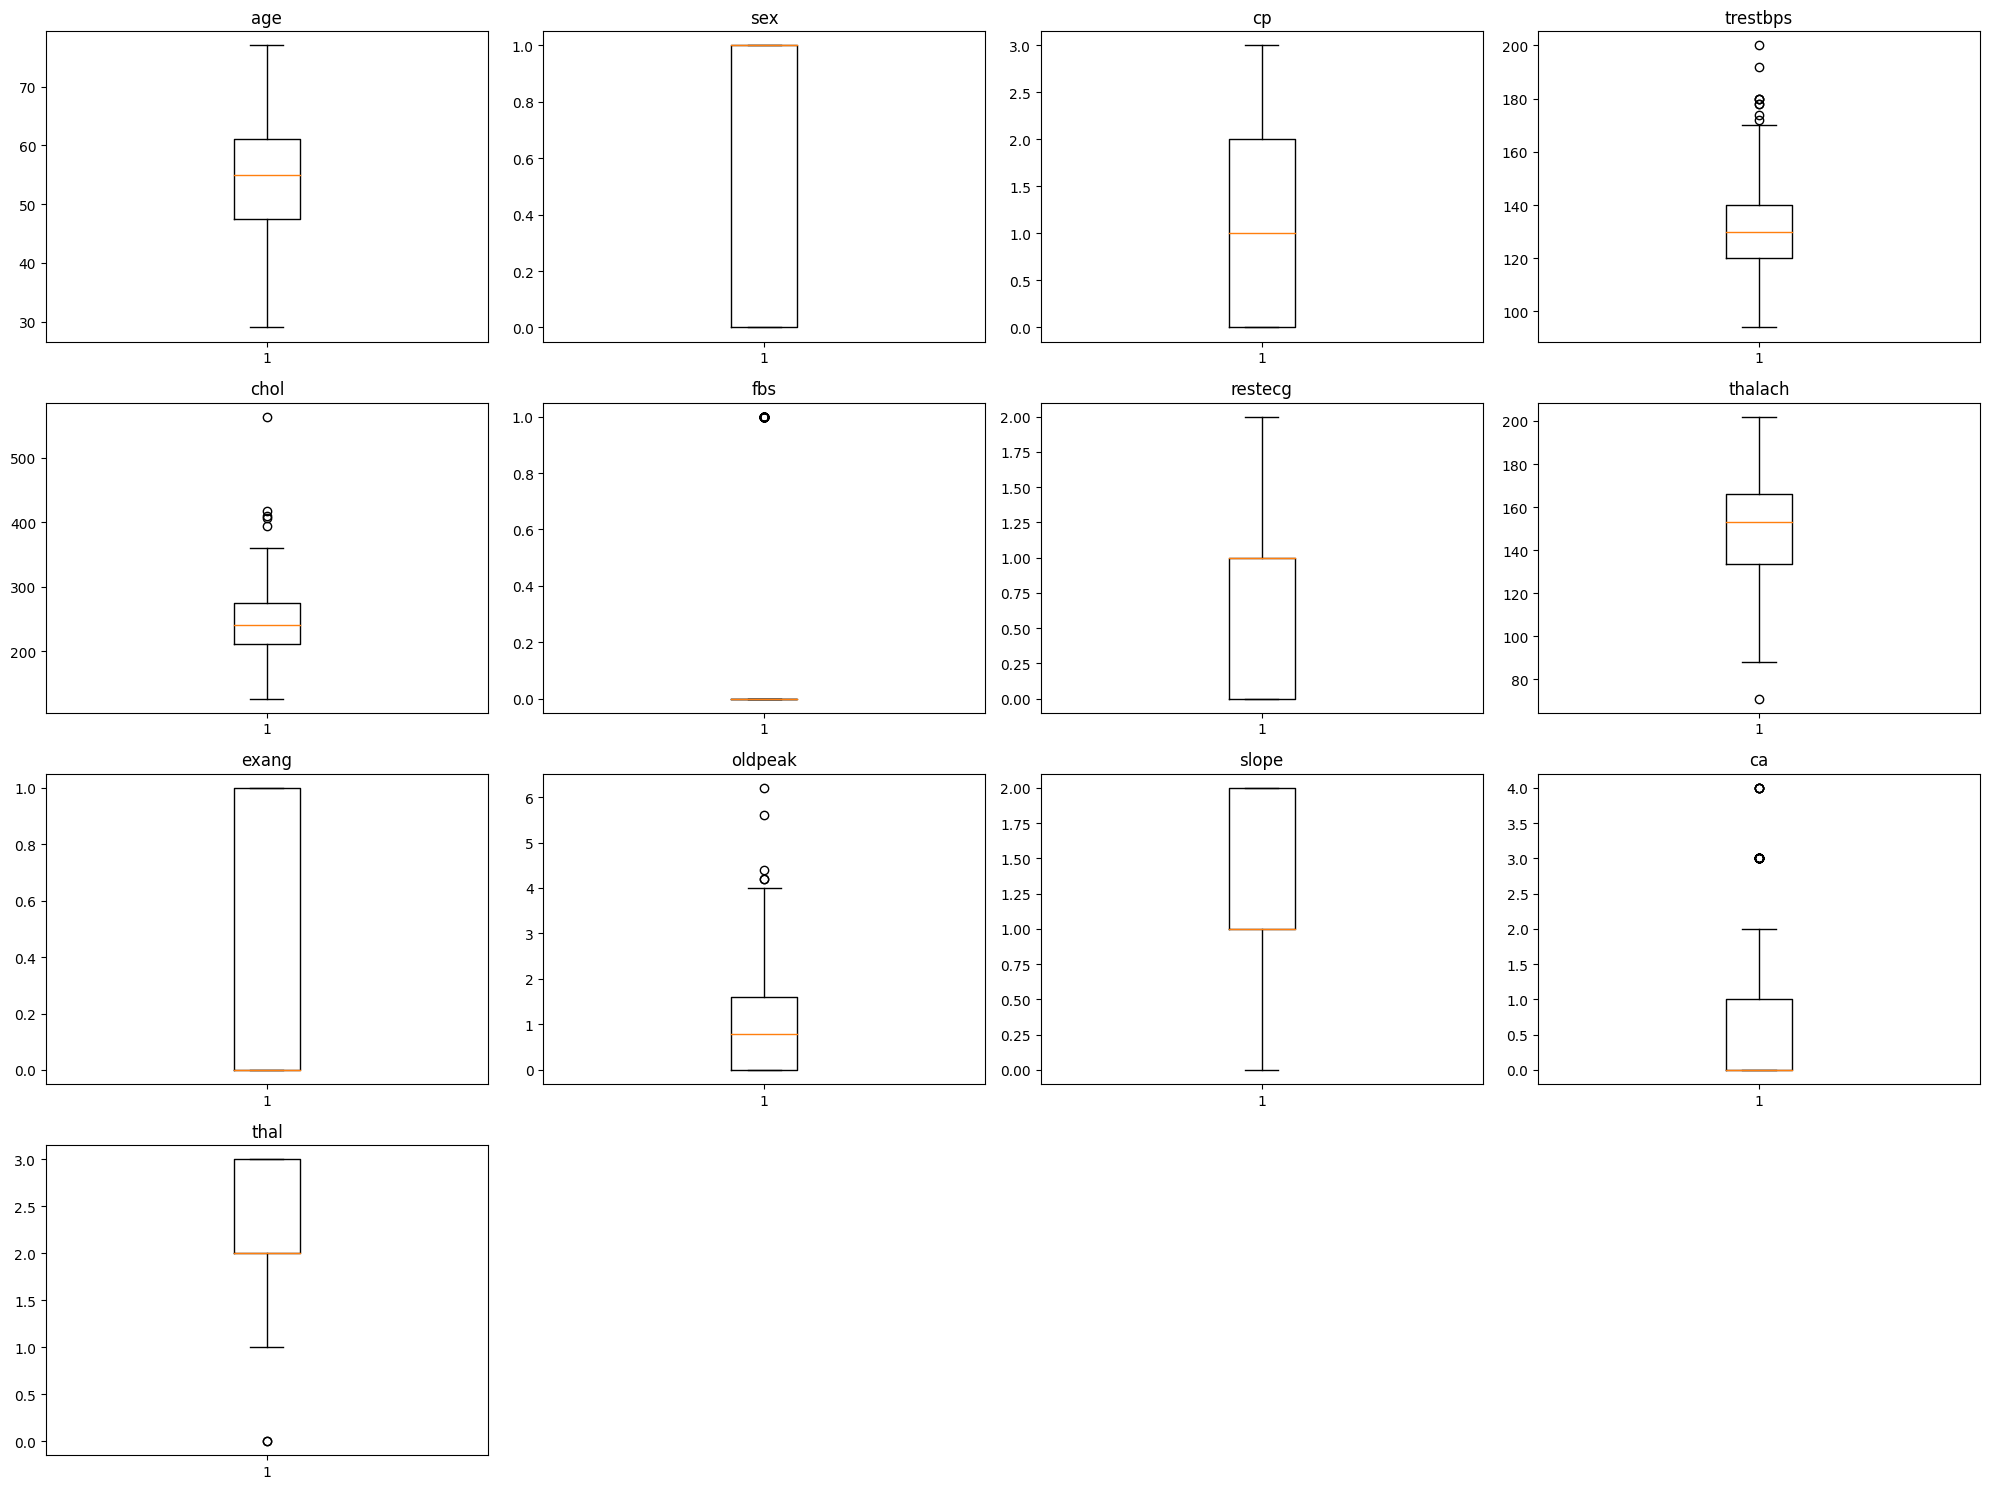

In [ ]:
# prompt: plot box plots for all the columns of X

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

# Create boxplots for each column in X
for i, column in enumerate(X.columns):
    plt.subplot(4, 4, i+1)
    plt.boxplot(X[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data
print("The features after standardization")
print(X)

The features after standardization
[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [ ]:
# prompt: numpy.ndarray' object has no attribute 'columns'

import pandas as pd
X = pd.DataFrame(standardized_data, columns=heart_disease_dataset.columns[:-1])
print("The features after standardization")
print(X)

The features after standardization
          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464 -1.468418 -0.938515  0.478391 -0.101730 -0.417635  0.898962   
299 -1.033002  0.681005  1.973123 -1.234996  0.342756 -0.417635  0.898962   
300  1.503641  0.681005 -0.938515  0.706843 -1.029353  2.394438  0.898962   
301  0.290464  0.681005 -0.938515 -0.092738 -2.227533 -0.417635  0.898962   
302  0.290464 -1.468418  0.032031 -0.092738 -0.198357 -0.417635 -1.005832   

      thalach     exang   oldpeak     sl

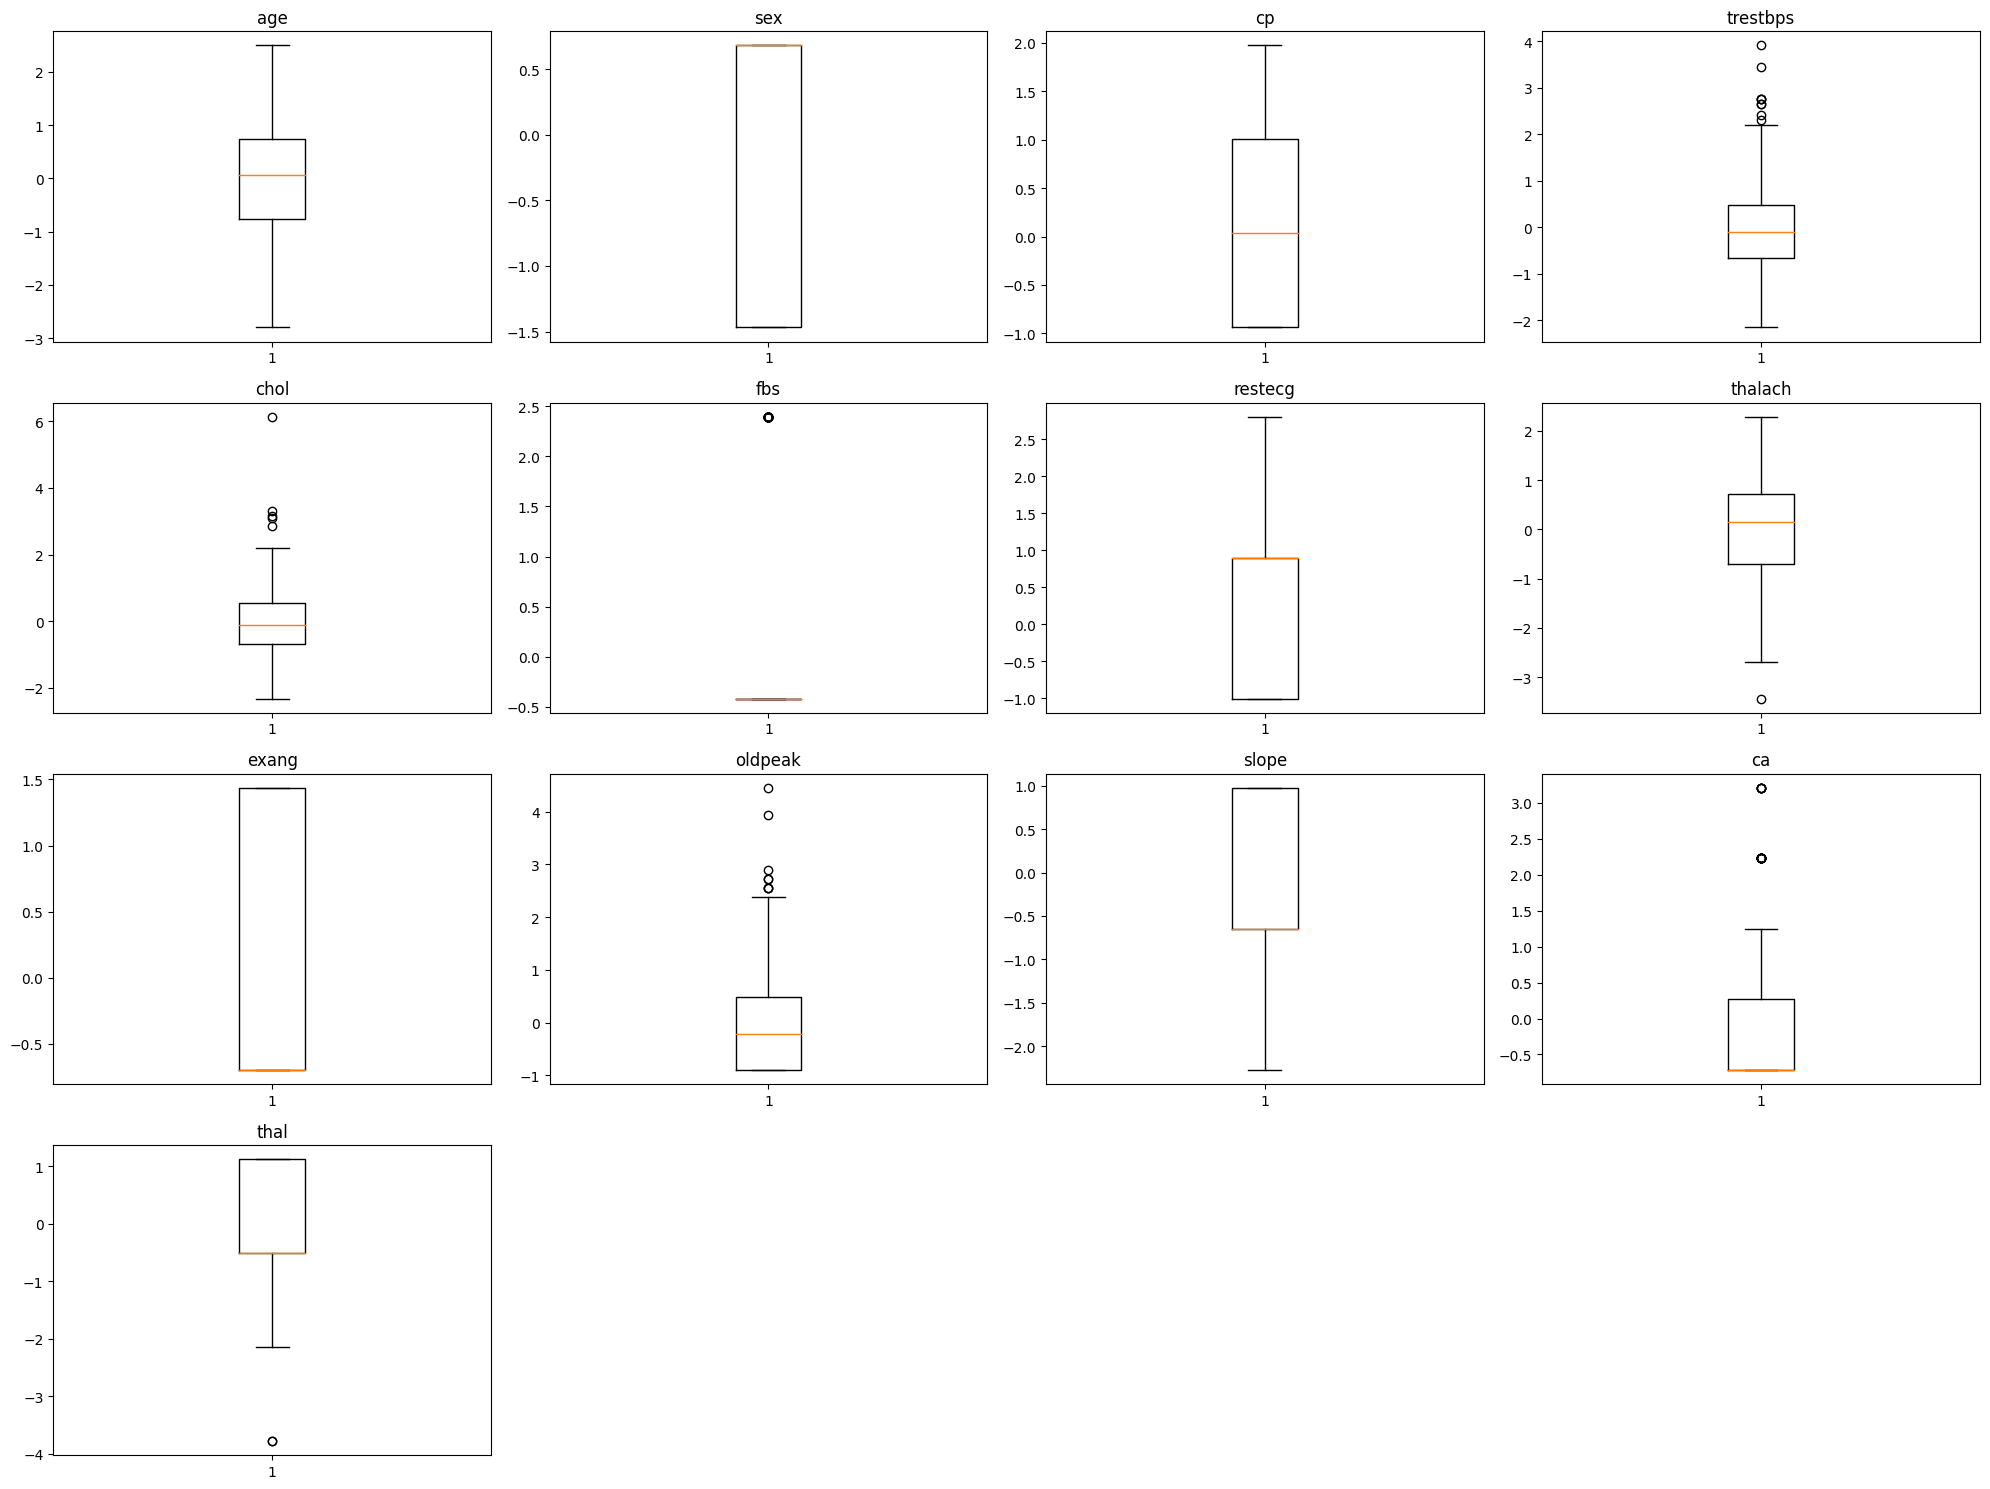

In [ ]:
# prompt: plot the box plots for each columns of X

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

# Create boxplots for each column in X
for i, column in enumerate(X.columns):
    plt.subplot(4, 4, i+1)
    plt.boxplot(X[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


(303, 13) = (242, 13) + (61, 13)

Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)
print("Model trained successfully !")

Model trained successfully !


Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.859504132231405


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.819672131147541


Making a Predictive System

In [ ]:
input_data = (22,0,3,130,250,1,1,150,0,1.4,1,0,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

#print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not having a heart-disease')
else:
  print('The person is having a heart-disease')

[1]
The person is having a heart-disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: also apply, XGB, GNB

from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# **XGBoost**
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

xgb_train_prediction = xgb_classifier.predict(X_train)
xgb_training_data_accuracy = accuracy_score(xgb_train_prediction, Y_train)
print('Accuracy score of the training data for XGBoost: ', xgb_training_data_accuracy)

xgb_test_prediction = xgb_classifier.predict(X_test)
xgb_test_data_accuracy = accuracy_score(xgb_test_prediction, Y_test)
print('Accuracy score of the test data for XGBoost: ', xgb_test_data_accuracy)

# **Naive Bayes**
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, Y_train)

gnb_train_prediction = gnb_classifier.predict(X_train)
gnb_training_data_accuracy = accuracy_score(gnb_train_prediction, Y_train)
print('Accuracy score of the training data for Naive Bayes: ', gnb_training_data_accuracy)

gnb_test_prediction = gnb_classifier.predict(X_test)
gnb_test_data_accuracy = accuracy_score(gnb_test_prediction, Y_test)
print('Accuracy score of the test data for Naive Bayes: ', gnb_test_data_accuracy)

Accuracy score of the training data for XGBoost:  1.0
Accuracy score of the test data for XGBoost:  0.7540983606557377
Accuracy score of the training data for Naive Bayes:  0.8471074380165289
Accuracy score of the test data for Naive Bayes:  0.819672131147541


In [ ]:
# prompt: apply RF, DT, Naive base, XGB, LDA, LR classifiers and evaluate accuracies

# **Random Forest**
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)

rf_train_prediction = rf_classifier.predict(X_train)
rf_training_data_accuracy = accuracy_score(rf_train_prediction, Y_train)
print('Accuracy score of the training data for Random Forest: ', rf_training_data_accuracy)

rf_test_prediction = rf_classifier.predict(X_test)
rf_test_data_accuracy = accuracy_score(rf_test_prediction, Y_test)
print('Accuracy score of the test data for Random Forest: ', rf_test_data_accuracy)

# **Decision Tree**
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)

dt_train_prediction = dt_classifier.predict(X_train)
dt_training_data_accuracy = accuracy_score(dt_train_prediction, Y_train)
print('Accuracy score of the training data for Decision Tree: ', dt_training_data_accuracy)

dt_test_prediction = dt_classifier.predict(X_test)
dt_test_data_accuracy = accuracy_score(dt_test_prediction, Y_test)
print('Accuracy score of the test data for Decision Tree: ', dt_test_data_accuracy)

# **Naive Bayes**
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

nb_train_prediction = nb_classifier.predict(X_train)
nb_training_data_accuracy = accuracy_score(nb_train_prediction, Y_train)
print('Accuracy score of the training data for Naive Bayes: ', nb_training_data_accuracy)

nb_test_prediction = nb_classifier.predict(X_test)
nb_test_data_accuracy = accuracy_score(nb_test_prediction, Y_test)
print('Accuracy score of the test data for Naive Bayes: ', nb_test_data_accuracy)

# **XGBoost**
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

xgb_train_prediction = xgb_classifier.predict(X_train)
xgb_training_data_accuracy = accuracy_score(xgb_train_prediction, Y_train)
print('Accuracy score of the training data for XGBoost: ', xgb_training_data_accuracy)

xgb_test_prediction = xgb_classifier.predict(X_test)
xgb_test_data_accuracy = accuracy_score(xgb_test_prediction, Y_test)
print('Accuracy score of the test data for XGBoost: ', xgb_test_data_accuracy)

# **LDA**
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, Y_train)

lda_train_prediction = lda_classifier.predict(X_train)
lda_training_data_accuracy = accuracy_score(lda_train_prediction, Y_train)
print('Accuracy score of the training data for LDA: ', lda_training_data_accuracy)

lda_test_prediction = lda_classifier.predict(X_test)
lda_test_data_accuracy = accuracy_score(lda_test_prediction, Y_test)
print('Accuracy score of the test data for LDA: ', lda_test_data_accuracy)

# **Logistic Regression**
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, Y_train)

lr_train_prediction = lr_classifier.predict(X_train)
lr_training_data_accuracy = accuracy_score(lr_train_prediction, Y_train)
print('Accuracy score of the training data for Logistic Regression: ', lr_training_data_accuracy)

lr_test_prediction = lr_classifier.predict(X_test)
lr_test_data_accuracy = accuracy_score(lr_test_prediction, Y_test)
print('Accuracy score of the test data for Logistic Regression: ', lr_test_data_accuracy)

Accuracy score of the training data for Random Forest:  1.0
Accuracy score of the test data for Random Forest:  0.7704918032786885
Accuracy score of the training data for Decision Tree:  1.0
Accuracy score of the test data for Decision Tree:  0.8032786885245902
Accuracy score of the training data for Naive Bayes:  0.8471074380165289
Accuracy score of the test data for Naive Bayes:  0.819672131147541
Accuracy score of the training data for XGBoost:  1.0
Accuracy score of the test data for XGBoost:  0.7540983606557377
Accuracy score of the training data for LDA:  0.8471074380165289
Accuracy score of the test data for LDA:  0.819672131147541
Accuracy score of the training data for Logistic Regression:  0.8471074380165289
Accuracy score of the test data for Logistic Regression:  0.7868852459016393


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (22,0,3,130,250,1,1,150,0,1.4,1,0,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not having a heart-disease')
else:
  print('The person is having a heart disease')

[0]
The person is not having a heart-disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
